<a href="https://colab.research.google.com/github/dacq-trap/MachineLearningWorkshop/blob/main/%E7%AC%AC4%E5%9B%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習講習会 第四回 実習編



---




## 手書き文字分類

scikit-learnに用意されているthe degit datasetを利用して, 手書き文字の分類問題を行ってみます.

まず, scikit-learnとmatplotlibのimportを行います.

| import | 機能 |
|--|--|
|matplotlib.pyplot | グラフ描画用 |
|datasets | データセット (今回はその中のdegitsを使用する) |
|svm | Support Vector Machines ([詳細](https://scikit-learn.org/stable/modules/svm.html#classification)) (今回はこの中のLinearSVCを使用する) |
|metrics | モデル評価用 (今回はこの中のclassification_reportを使用する) |
|train_test_split | 訓練/テストデータ分割用 |


In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### (復習) 手書き文字データセットの読み込み

先ほどimportしたdatasetsから手書き文字データセットを読み込み, 試しにいくつか表示させてみます.<br>
表示にはmatplotlib.pyplotのsubplotsを利用します.

Text(0.5, 1.0, 'Label: 0')

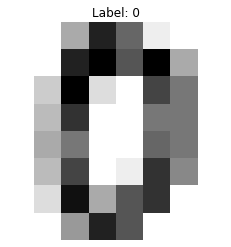

In [ ]:
# 手書き文字データセットの読み込み
digits = datasets.load_digits()

# 読み込んだデータセットから先頭1つを取得する
image = digits.images[0]  # 画像データ取得
label = digits.target[0]  # ラベルデータ取得

# 取得した画像/ラベルを表示
fig, ax = plt.subplots()              # サブプロットを1つ生成
ax.set_axis_off()                     # 軸の表示をoff
ax.imshow(image, cmap=plt.cm.gray_r)  # 表示色を白黒にして表示
ax.set_title(f"Label: {label}")       # タイトルを付ける

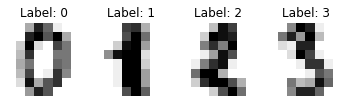

In [ ]:
# 画像/ラベルを4つ並べて表示
fig, axes = plt.subplots(nrows=1, ncols=4) # 縦:1 横:4 でサブプロットを作成
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Label: {label}")

### 分類 (Classification)

読み込んだデータセットを用いて, Classification を行ってみます.<br>
なお, 入力は1次元である必要があるため, 事前に reshape しています.

In [ ]:
# 画像データの変形
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 分類器の作成 (SVCを使用)
clf = svm.SVC(gamma=0.001)

# 訓練データとテストデータに分割 (訓練データ: 50%, テストデータ:50% に分割)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# 訓練データを用いて分類器を訓練
clf.fit(X_train, y_train)

# テストデータ(画像データ)からラベルを予測
predicted = clf.predict(X_test)

テストデータの先頭4つと予測したラベルを表示します.

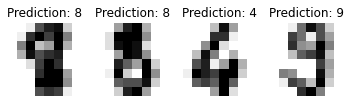

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4)
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)   # 画像が1次元配列になっているため, 表示のために2次元に変形
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Prediction: {prediction}")

classification_reportを用いて, 主な分類指標を表すテキストを出力します

In [ ]:
print(
    f"{metrics.classification_report(y_test, predicted)}"
)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



(オマケ) 混同行列(confusion matrix)も表示してみます

(混同行列の表示には, metrics.ConfusionMatrixDisplay.from_predictionsを使用しています)

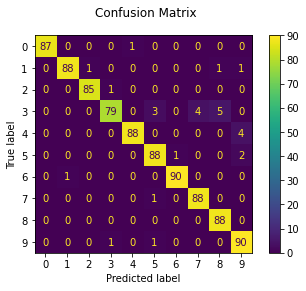

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

---

## アヤメ(アイリス)の分類

sklearnに用意されている the iris dataset を用いて, アヤメ属に分類される3品種について Classification を行ってみます.


まずは, 先ほどと同様にimportします<br>
(文字分類問題を動かしている場合は, 既にimportいるので省略可能)

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

### irisデータセットの読み込み

datasetを読み込んで, 中身を確認してみます.

In [ ]:
# datasetの読み込み
iris = datasets.load_iris()

# データ部分の形状を確認 (データセット数: 150, 特徴量: 4)
print(f"dataset shape: {iris.data.shape}\n")

# データ/ラベルの先頭を表示
print(f"the first data/label of the dataset: {iris.data[0]}, {iris.target[0]}\n")

# データの先頭の型を確認
print(f"the type of the first data: {type(iris.data[0])}\n")

# 特徴量の種類を確認
print(f"feature names: {iris.feature_names}\n")

# 花の種類を確認
print(f"target names: {iris.target_names}\n")

dataset shape: (150, 4)

the first data/label of the dataset: [5.1 3.5 1.4 0.2], 0

the type of the first data: <class 'numpy.ndarray'>

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target names: ['setosa' 'versicolor' 'virginica']



特徴量が4つ, アヤメの種類が3種類あることが確認できました.<br>
各特徴量と種類は次のような対応になっています.

| 特徴量配列の番号 | Attribute |
|--|--|
| 0 | がくの長さ (sepal length) |
| 1 | がくの幅 (sepal width) |
| 2 | 花弁の長さ (petal length) |
| 3 | 花弁の幅 (petal width) |

| ラベル番号 | アヤメの種類 |
|--|--|
| 0 | セトサ (setosa) |
| 1 | バージカラー (versicolor) |
| 2 | バージニカ (virginica) |

では, ここで一度, データをDataFrameへと変形し, データをざっくり眺めてみます.

In [ ]:
import pandas as pd

# DataFrameへ変形
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# ラベル部分を種類名へと置換
df_iris.loc[df_iris['target'] == 0, 'target'] = "setosa"
df_iris.loc[df_iris['target'] == 1, 'target'] = "versicolor"
df_iris.loc[df_iris['target'] == 2, 'target'] = "virginica"

# DataFrameの先頭5行を表示
print("The first five rows:")
print(df_iris.head(5))

# データをざっくり眺める
print("The description of the dataFrame")
df_iris.describe()

The first five rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
The description of the dataFrame


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(オマケ) ついでにseabornを使ってペアプロットしてみます

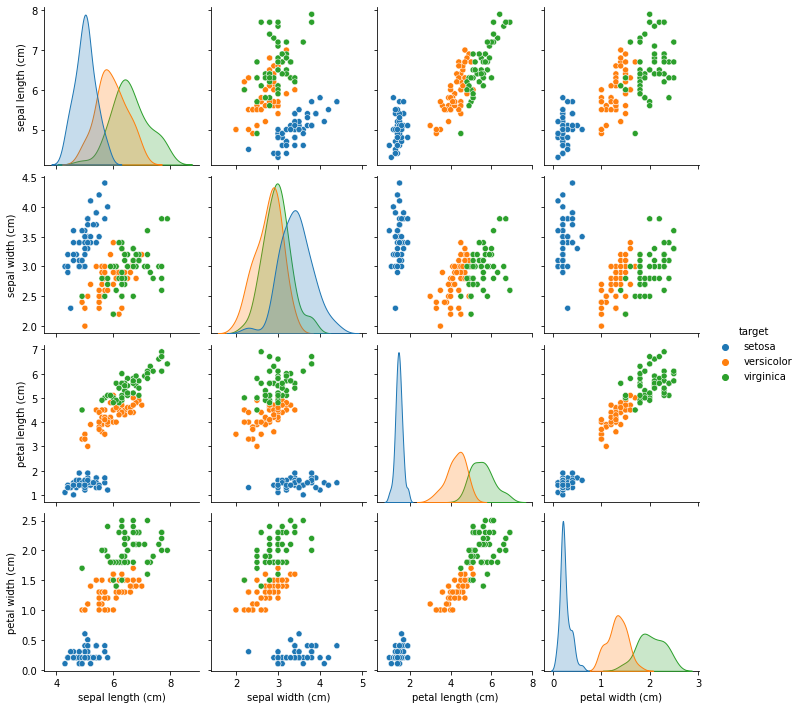

In [ ]:
import seaborn as sns

sns.pairplot(df_iris, hue="target")

### 分類(Classification)

ここまでデータセットを色々見てみましたが, そろそろ分類をします.<br>
練習用に一部プログラムを抜いてあるので, 適宜埋めながら動かしてみてください. 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



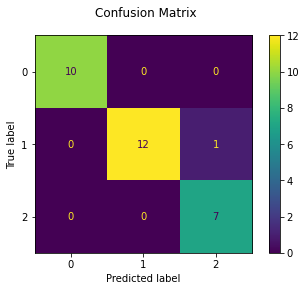

In [ ]:
# 分類器の作成 (LinearSVCを使用)
clf = svm.LinearSVC()

# 訓練データとテストデータに分割 (訓練データ: 80%, テストデータ:20% に分割, シャッフルあり)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, shuffle=True, random_state=10
)

# 訓練データを用いて分類器を訓練
clf.fit(X_train, y_train)

# テストデータ(画像データ)からラベルを予測
predicted = clf.predict(X_test)

# 分類指標の表示
print(
    f"{metrics.classification_report(y_test, predicted)}"
)

# 混同行列(confusion matrix)の表示
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

---

## カリフォルニアの住宅価格予測

最後に, カリフォルニアの住宅価格(ブロック単位)を複数のパラメータから予測してみます

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## データセットの読み込み

In [ ]:
# データセット読み込み
housing = datasets.fetch_california_housing()

# DataFrameの作成
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['Price'] = housing.target
df_housing.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


各特徴量の説明は以下の通りです.

| 名前 | 意味 |
|--|--|
| MedInc | 収入の中央値 |
| HouseAge | ブロック内の家の中央年齢値 |
| AveRooms | 平均部屋数 |
| AveBedrms | ベッドルームの平均数 |
| Population | ブロック人口 |
| AveOccup | 平均住宅占有率 |
| Latitude | ブロックの緯度 |
| Longitude | ブロックの経度 |


ここから, データの分布を確認してみます.

In [ ]:
# データの統計を確認
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


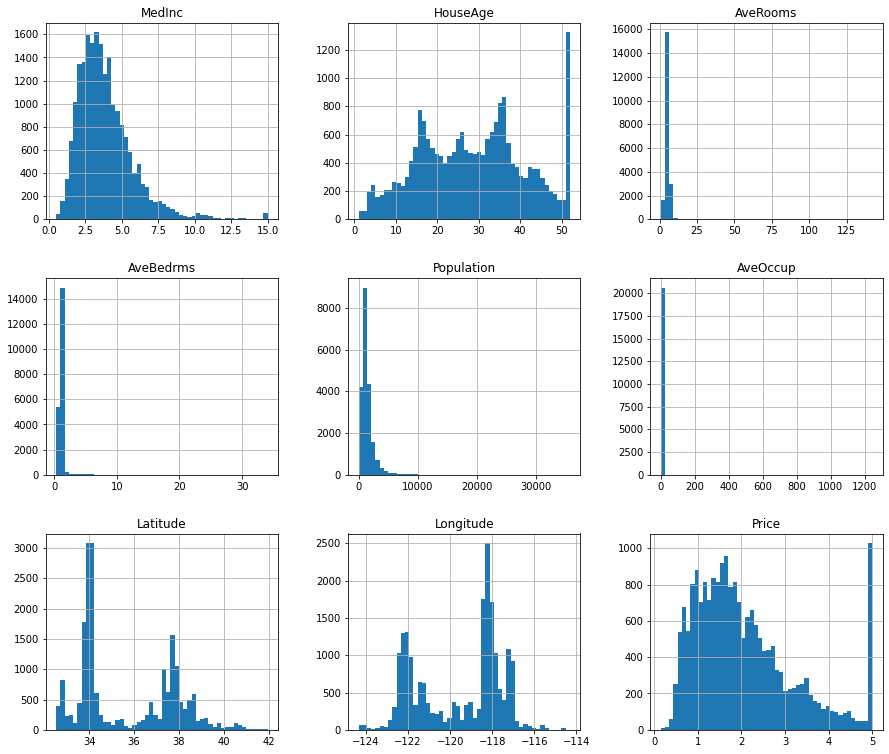

In [ ]:
# DataFrameからヒストグラムを生成
df_housing.hist(bins=50, figsize=(15, 13))  # 基数:50, グラフのサイズ: (15, 13)に設定
plt.show()

In [ ]:
# 各特徴量の相関係数を確認
df_housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Figure size 1440x1080 with 0 Axes>

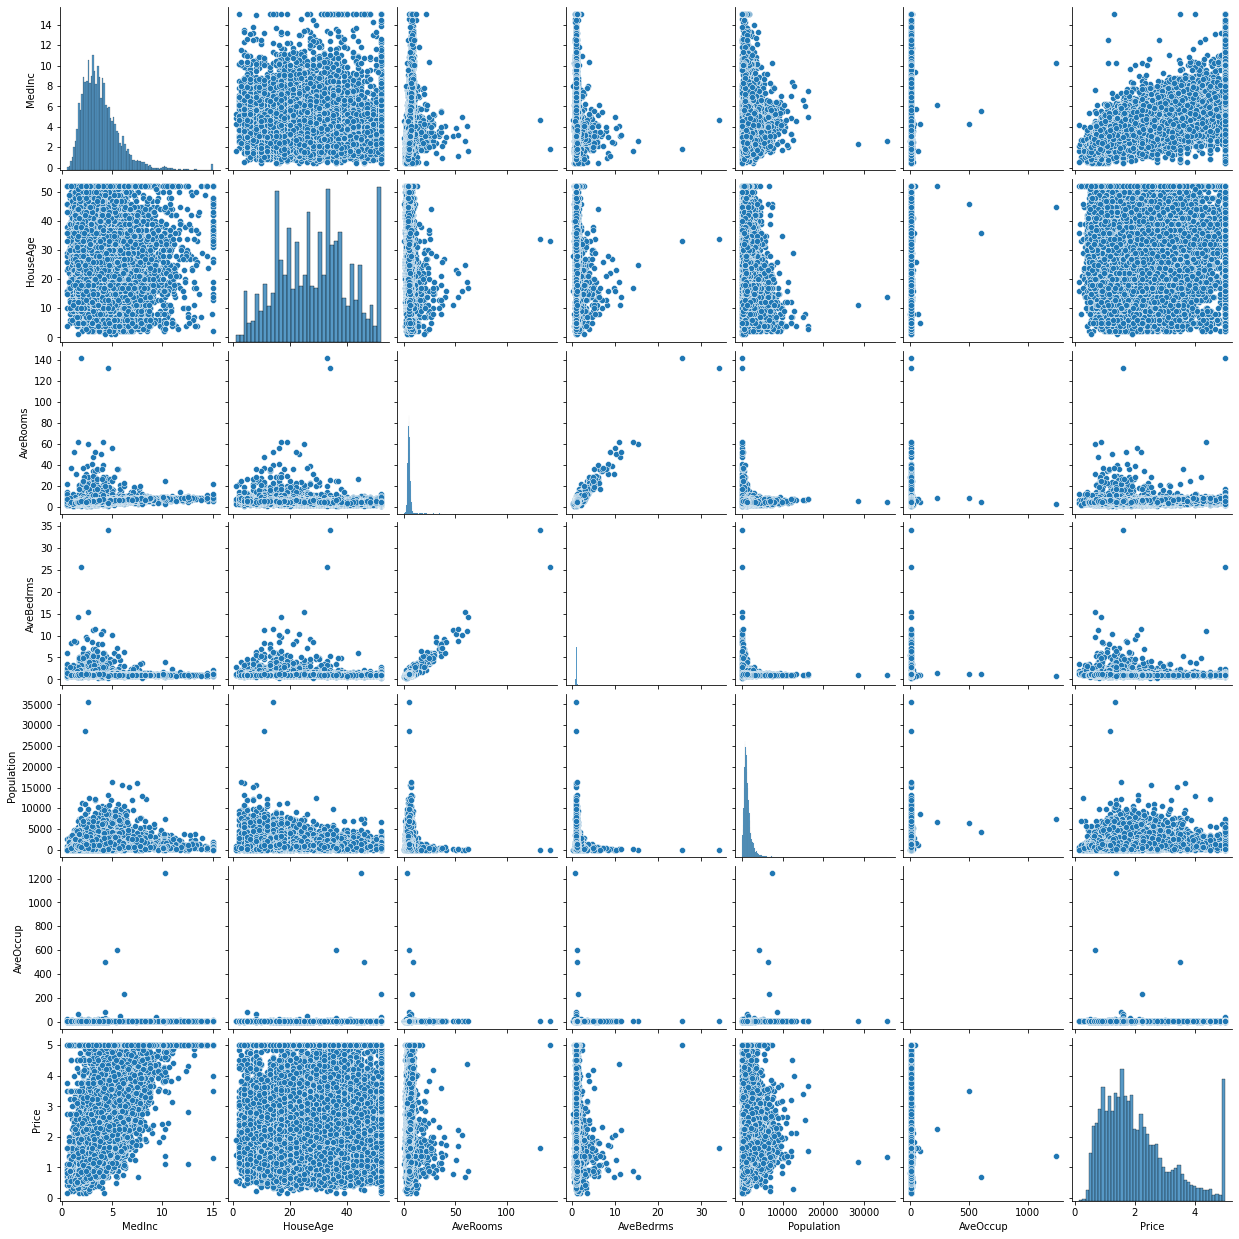

In [ ]:
# (オマケ) 緯度/経度を除いて相関図を表示
plt.figure(figsize=(20, 15))
sns.pairplot(df_housing.drop(['Latitude', 'Longitude'], axis=1))
plt.show()

## 住宅価格の予測

今回は標準化を行い, データを 平均:0, 分散:1 となるように変換します.

In [ ]:
# 特徴量の標準化 (平均:0, 分散:1 となるように変換)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(housing.data)
y = housing.target

In [ ]:
# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

今回は線形回帰を用いて予測します.

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

性能評価にはRMSE(Root Mean Square Error)を使用します.<br>
$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(x^{(i)}-y^{(i)})^2}$

訓練データと検証セットについて性能を確認します.

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
print('訓練セット誤差(RMSE):{:2f}'.format(rmse_train))

pred_val = reg.predict(X_val)
mse_val = mean_squared_error(y_val, pred_val)
rmse_val = np.sqrt(mse_val)
print('検証セット誤差(RMSE):{:2f}'.format(rmse_val))

pred_test = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
print('テストセット誤差(RMSE):{:2f}'.format(rmse_test))

訓練セット誤差(RMSE):0.722043
検証セット誤差(RMSE):0.734044
テストセット誤差(RMSE):0.735228


---

実習はこれで終わりになりますが, 他のデータセットやモデルを色々と試してもらえると良いかと思います.